# Analyse en Composantes Principales


L'Analyse en composantes principales est une méthode pour interpréter les données. Elle fonctionne sur des données décrites par par des attributs réels et est basée sur la méthodes des projections vue précédemment.

Cette méthode cherche à déterminer des tendances dans les données, et par là des oppositions grand/petit, gauche/droite, etc. Cette méthode est d'autant plus remarquable que ces tendances/oppositions peuvent être quantifiées : les interprétations (toujours subjectives) de nos nos données sont alors soutenus par des valeurs numériques (objectives).

Pour illustrer la méthode on utilisera nos (maintenant classiques) iris de fisher.

## Données : les iris de fisher

https://fr.wikipedia.org/wiki/Iris_de_Fisher On a pas besoin des espèces, on veut voir ce qu'il y a dans les données.

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas

sns.set()

In [2]:
data = sns.load_dataset('iris').drop(columns="species")
data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Matrice X

Nous allons centrer et réduire les données.

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pandas.DataFrame(scaler.fit_transform(data), columns=data.columns)

### Caractéristiques initiales 2 à 2

Nos données représentent 150 iris selon 4 caractéristiques. Commençons par représenter graphiquement les axes 2 à 2.

> **Attention** : [`seaborn.pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html) n'est pas compatible avec les axes de matplotlib.

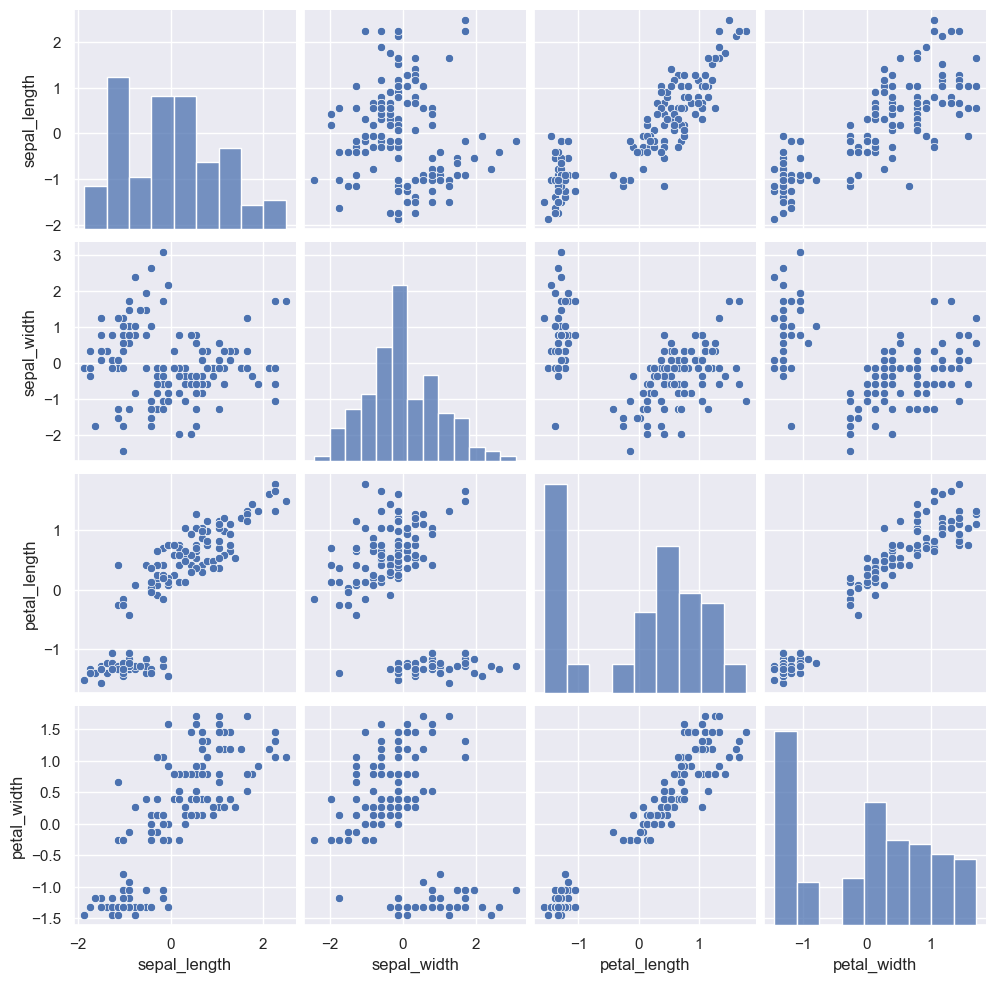

In [12]:
sns.pairplot(X)

plt.show()

* La moyenne de chaque variable à 0 signifie que le centre de gravité du nuage est l'origine.
* L'écart type de chaque variable est 1 ce qui signifie que les valeurs vont être presque toutes comprisent en -2 et 2

Le données se répartissent selon des axes (les attributs).

Il arrive que certains axes permettent de déterminer des groupes dans nos données, par exemple ici `petal_length` qui a l'air de séparer nos iris en 2 groupes :

* un resserré sur les petites valeurs
* un autre plus long prenant les valeurs intermédiaire à grande

Mais la plupart du temps, comme par exemple ici `sepal_length`, les données s'étalent tout au long de l'axe. **chaque axe détermine une tendance au sein de nos données** : elle vont de petit à grand selon cet axe.


> Nos données étant réduite, **chaque axe explique 1/4 de l'information totale**.

#### Corrélation

La corrélation linéaire permet d'expliquer un axe par rapport à un autre. 

In [7]:
X.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


On voit que :

* la longueur du pétale est très corrélée positivement à sa largeur
* la longueur du sépale est corrélée positivement à la largeur et à la longueur du pétale.

## But de l'analyse en composantes principale

Les axes déterminent des tendances au sein des données. La méthode cherche à déterminer les tendances les plus importantes (principales) des données.

**Attention** : on ne cherche pas à supprimer des axes initiaux ou a expliquer un axe initial par un autre. On cherche à expliquer nos données en considérant tous nos attributs.

En effet, si l'on a choisi de prendre tous ces attributs pour décrire nos données c'est que l'on pense qu'ils sont chacun aussi important l'un que l'autre (le choix des attributs a été une étape antérieure).


Pour cela, on cherche les axes maximisant la projection, ceci permettant d'expliquer les données par rapport aux axes.

### Projections d'inertie maximale

On cherche tous les axes maximisant l'inertie.

In [14]:
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA 

pca = PCA() 
pca.fit(X)

U = np.transpose(pca.components_) # vecteurs propres
I = pandas.DataFrame(np.transpose(pca.explained_variance_ratio_), columns=["pourcentage"])  # information véhiculée

C = pandas.DataFrame(X @ U, index=X.index) # nouvelles coordonnées

corrélations = pandas.DataFrame([[C[facteur].corr(X[column]) for facteur in C] for column in X], index=X.columns)
cos2 = (C**2).div((X**2).sum(axis=1), axis='index')

### Inertie et information

### Inertie totale

On a coutume de représenter l'inertie par axe.

In [18]:
I

,pourcentage
0,0.729624
1,0.228508
2,0.036689
3,0.005179


Si les chiffres, c'est bien, une représentation graphique est plus explicite : 

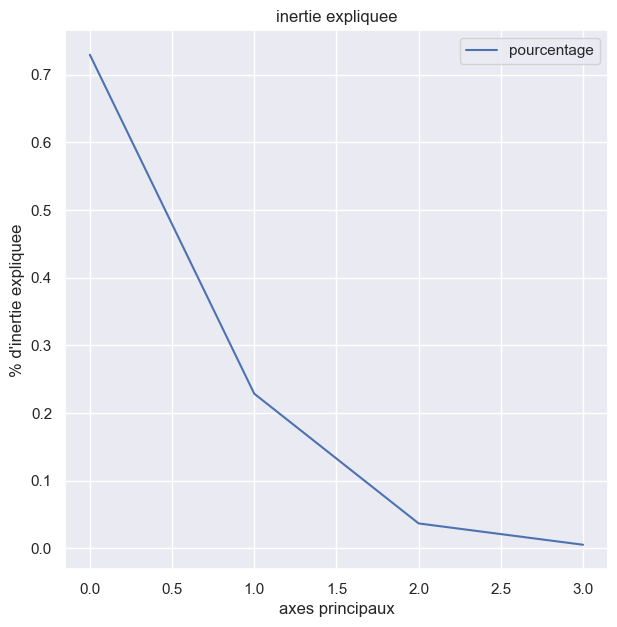

In [17]:
fig, ax = plt.subplots(figsize=(7, 7)) 

I.plot(ax=ax)

plt.title("inertie expliquée")
plt.xlabel("axes principaux")
plt.ylabel("% d'inertie expliquée")

plt.show()

L'inertie est bien décroissante, le 1er axe (axe d'index 0) expliquant plus de 70% de l'information, le second (d'index 1) seulement un peu plus de 20%.

A eux deux ils expliquent donc plus de 90% de l'information totale ! Pour montrer cela, on va représenter l'inertie cumulée.

In [19]:
I.cumsum()

,pourcentage
0,0.729624
1,0.958132
2,0.994821
3,1.000000


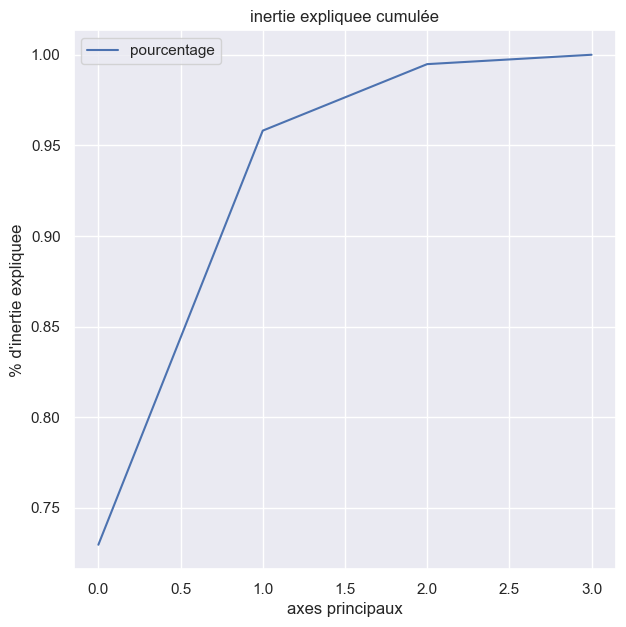

In [20]:
fig, ax = plt.subplots(figsize=(7, 7)) 

I.cumsum().plot(ax=ax)

plt.title("inertie expliquée cumulée")
plt.xlabel("axes principaux")
plt.ylabel("% d'inertie expliquée")

plt.show()

Le nombre d'axe à garder pour l'analyse peut être déterminé de deux façon :

* le pourcentage minimale d'information que l'on veut conserver
* chercher un point d'inflexion (annulation de la dérivée seconde) à la courbe d'inertie : l'ajout d'un axe devient inneficace par rapport au gain d'information.

Dans notre cas, deux axes permettent d'expliquer à eux seuls 95% de l'information.

### Interprétation des axes

Nous avons décidé de garder les 2 premiers axes. regardons comment les expliquer, en dessinant le cercle des corrélations

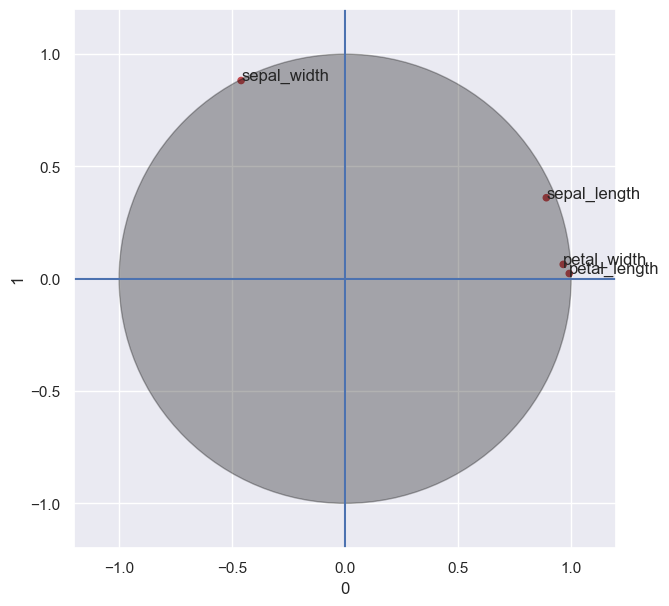

In [35]:
axe_x = 0
axe_y = 1

couleurs = [sns.color_palette()[3]] * len(corrélations)

fig, ax = plt.subplots(figsize=(7, 7)) 

draw = corrélations.plot.scatter(x=axe_x, y=axe_y, ax=ax, 
                                 color=couleurs)


for index, row in corrélations.iterrows():
    draw.annotate(str(index), (row[axe_x], row[axe_y]))

draw.add_patch(plt.Circle((0, 0), radius=1, color=(0, 0, 0, .3)))

plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.axvline(0)
plt.axhline(0)

plt.show()

Si l'on regarde les éléments les pls corrélés avec chaque axe :

* l'axe 0 (horizontal) s'explique par la longueur et largeur du pétale ainsi que la longueur du sépale
* l'axe 1 (vertical) s'explique par la largeur du sépale

Si l'on avait cherché à expliquer les axes 2 et 3 qui expliquent respectivement 3% et .5% de l'information, on pourrait regarder les cercles de corrélations pour ces deux axes. Nous n'allons pas le faire ici.

### Dessiner les projections

Représentons nos iris sur les axes principaux 0 et 1

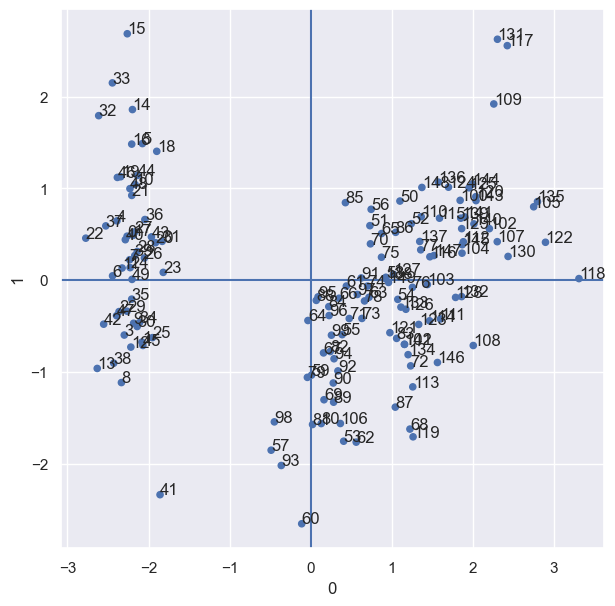

In [36]:
axe_x = 0
axe_y = 1

couleurs = [sns.color_palette()[0]] * len(C)

fig, ax = plt.subplots(figsize=(7, 7)) 

draw = C.plot.scatter(axe_x, axe_y, color=couleurs , ax=ax)

for index, row in C.iterrows():
    draw.annotate(str(index), (row[axe_x], row[axe_y]))
    
plt.axvline(0)
plt.axhline(0)

plt.show() 

On n'y voit pas grand chose. Regroupons les iris par espèces. 

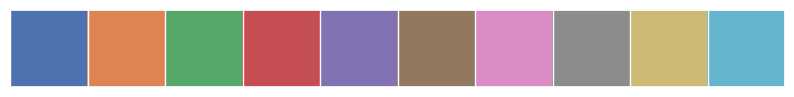

In [40]:
# palette de couleurs

current_palette = sns.color_palette()
sns.palplot(current_palette)
plt.show() 

In [41]:
# une couleur pour chaque classe d'iris

colors = [current_palette[0], current_palette[2], current_palette[3]]
iris_colors = [colors[i // 50] for i in range(len(X))]

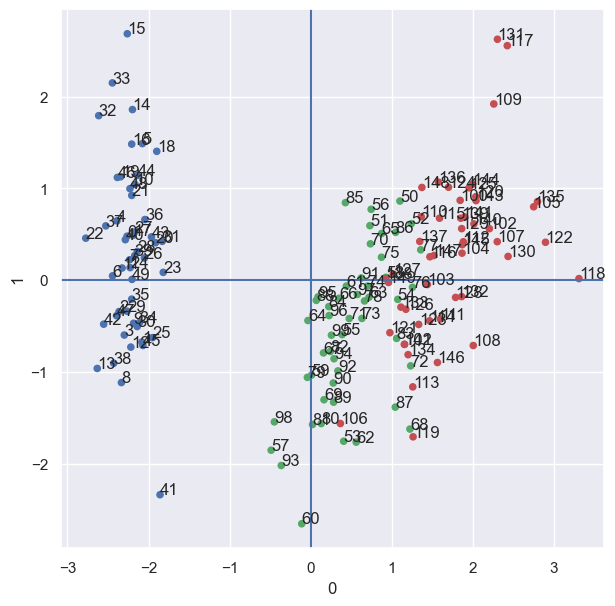

In [42]:
axe_x = 0
axe_y = 1

couleurs = iris_colors

fig, ax = plt.subplots(figsize=(7, 7)) 

draw = C.plot.scatter(axe_x, axe_y, color=couleurs, ax=ax)

for index, row in C.iterrows():
    draw.annotate(str(index), (row[axe_x], row[axe_y]))
    
plt.axvline(0)
plt.axhline(0)

plt.show() 

On remarque que les iris bleues sont bien représenté à gauche, puis il y a un gradiant :
* les bleus sont petites
* les verts sont moyennes
* les rouges sont grandes

Et c'est pas clair entre moyen et grand.

La dispersion selon cet axe explique 73% de nos données.

### Qualité de la projection

Globalement, les points vont bien se représenter sur l'axe, mais individuellement, il peut exister des points qui en sont éloignés. 

On calcule la qualité de la projection en calculant l'angle entre le point initial et le point projeté. Ceci parce que ça se calcule bien : le rapport entre la norme du projeté sur la norme du point dont le carré correspond au cosinus carré l'angle $\theta$ entre les 2 vecteur : $cos(\theta)^2 = \frac{||p(x_i)||^2}{||x_i||^2}$

Regardons les 10 iris qui se représentent le mieux sur le premier axe (cos2 très grand) :

In [44]:
cos2[0].sort_values().tail(10)

35    0.975615
39    0.978532
2     0.979041
24    0.979128
6     0.980924
26    0.983477
7     0.988448
23    0.990610
11    0.991876
49    0.994687
Name: 0, dtype: float64

Regardons les 10 iris qui se représentent le moins bien sur le premier axe (cos2 très petit) :

In [45]:
cos2[0].sort_values().head(10)

59    0.000096
81    0.000217
79    0.001319
60    0.001720
64    0.004565
80    0.006897
69    0.015484
88    0.030324
93    0.031084
67    0.032087
Name: 0, dtype: float64

En regardant les statistiques descriptives des $\cos^2$ pour le 1er axe :

In [46]:
cos2[0].describe()

count    150.000000
mean       0.663414
std        0.320657
min        0.000096
25%        0.488812
50%        0.800474
75%        0.915021
max        0.994687
Name: 0, dtype: float64

En gros ça se projette bien, 75% des points à un angle inférieur à 45°

In [47]:
import math

math.degrees(math.acos(math.sqrt(0.488812)))

45.64107868523713

angle en degré pour les 2 premiers axes : 

In [48]:
# angle: acos(sqrt(p))

from math import sqrt, acos, pi

cos2[[0, 1]].sum(axis=1).apply(lambda x: acos(sqrt(x)) * 180 / pi)

0       3.213403
1       6.680926
2       1.259640
3       2.714130
4       0.907534
         ...    
145    13.711586
146     7.010828
147     7.960639
148    28.707122
149    29.912071
Length: 150, dtype: float64

Les $\cos^2$ triées. On voit que l'angle maximum est de 63° :

In [50]:
cos2[[0, 1]].sum(axis=1).apply(lambda x: acos(sqrt(x)) * 180 / pi).sort_values()

5      0.622731
4      0.907534
15     0.963095
60     1.051858
2      1.259640
        ...    
70    36.605586
95    52.416898
66    52.691824
88    54.814486
84    62.892499
Length: 150, dtype: float64